In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn

# Cleaning and finding spread

In [4]:
# Day -2 pricing data
prices_day_minus_2 = pd.read_csv("C:\\Users\\asrir\\OneDrive\\Documents\\GitHub\\prosperity3\\round-2-island-data-bottle\\round-2-island-data-bottle\\prices_round_2_day_-1.csv", sep=';')
print(f"Loaded prices for day -2: {len(prices_day_minus_2)} rows")

prices_day_minus_1 = pd.read_csv("C:\\Users\\asrir\\OneDrive\\Documents\\GitHub\\prosperity3\\round-2-island-data-bottle\\round-2-island-data-bottle\\prices_round_2_day_0.csv", sep=';')
print(f"Loaded prices for day -1: {len(prices_day_minus_1)} rows")

# Day 0 pricing data
prices_day_0 = pd.read_csv("C:\\Users\\asrir\\OneDrive\\Documents\\GitHub\\prosperity3\\round-2-island-data-bottle\\round-2-island-data-bottle\\prices_round_2_day_1.csv", sep=';')
print(f"Loaded prices for day 0: {len(prices_day_0)} rows")

prices_day_minus_2['day_from_file'] = -1
prices_day_minus_1['day_from_file'] = 0
prices_day_0['day_from_file'] = 1

all_prices_df = pd.concat([prices_day_minus_2, prices_day_minus_1, prices_day_0], ignore_index=True)

# Print information about the combined DataFrame
print(f"Combined trades DataFrame has {len(all_prices_df)} rows")
print(f"Columns: {all_prices_df.columns.tolist()}")

Loaded prices for day -2: 80000 rows
Loaded prices for day -1: 80000 rows
Loaded prices for day 0: 80000 rows
Combined trades DataFrame has 240000 rows
Columns: ['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss', 'day_from_file']


In [5]:
all_prices_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,day_from_file
0,-1,0,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0,-1
1,-1,0,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0,-1
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0,-1
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0,-1
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,1,999900,JAMS,6519,204,NaN,NaN,NaN,NaN,6521,204,NaN,NaN,NaN,NaN,6520.0,0.0,1
239996,1,999900,RAINFOREST_RESIN,9992,34,NaN,NaN,NaN,NaN,10008,34,NaN,NaN,NaN,NaN,10000.0,0.0,1
239997,1,999900,SQUID_INK,1880,20,NaN,NaN,NaN,NaN,1884,20,NaN,NaN,NaN,NaN,1882.0,0.0,1
239998,1,999900,PICNIC_BASKET1,58713,15,58712.0,21.0,NaN,NaN,58724,15,58725.0,21.0,NaN,NaN,58718.5,0.0,1


In [6]:
#cleaning prices
def fill_bid_ask_two_phase(df):
    """
    Fill NaN values in bid/ask columns using a two-phase approach:
    1. Ensure bid_price_1, bid_volume_1, ask_price_1, and ask_volume_1 are filled
    2. Fill bid_price_2, bid_volume_2, bid_price_3, bid_volume_3 with bid_price_1, bid_volume_1 if they are NaN
    3. Fill ask_price_2, ask_volume_2, ask_price_3, ask_volume_3 with ask_price_1, ask_volume_1 if they are NaN
    """
    df = df.copy()
    
    df['bid_price_2'] = df['bid_price_2'].fillna(df['bid_price_1'])
    df['bid_volume_2'] = df['bid_volume_2'].fillna(df['bid_volume_1'])
    
    df['bid_price_3'] = df['bid_price_3'].fillna(df['bid_price_1'])
    df['bid_volume_3'] = df['bid_volume_3'].fillna(df['bid_volume_1'])
    
    # For ask columns
    df['ask_price_2'] = df['ask_price_2'].fillna(df['ask_price_1'])
    df['ask_volume_2'] = df['ask_volume_2'].fillna(df['ask_volume_1'])
    
    df['ask_price_3'] = df['ask_price_3'].fillna(df['ask_price_1'])
    df['ask_volume_3'] = df['ask_volume_3'].fillna(df['ask_volume_1'])
    
    return df

In [7]:
filled_prices_df = fill_bid_ask_two_phase(all_prices_df)

In [8]:
filled_prices_df['product'].unique()

array(['CROISSANTS', 'JAMS', 'SQUID_INK', 'PICNIC_BASKET1',
       'PICNIC_BASKET2', 'RAINFOREST_RESIN', 'DJEMBES', 'KELP'],
      dtype=object)

In [9]:
filled_prices_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,day_from_file
0,-1,0,CROISSANTS,4304,112,4304.0,112.0,4304.0,112.0,4305,112,4305.0,112.0,4305.0,112.0,4304.5,0.0,-1
1,-1,0,JAMS,6670,66,6669.0,137.0,6670.0,66.0,6671,66,6672.0,137.0,6671.0,66.0,6670.5,0.0,-1
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,2005.0,1.0,2006,31,2006.0,31.0,2006.0,31.0,2005.5,0.0,-1
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,59284.0,20.0,59294,2,59295.0,36.0,59294.0,2.0,59289.0,0.0,-1
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,30606.0,20.0,30612,20,30613.0,18.0,30612.0,20.0,30609.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,1,999900,JAMS,6519,204,6519.0,204.0,6519.0,204.0,6521,204,6521.0,204.0,6521.0,204.0,6520.0,0.0,1
239996,1,999900,RAINFOREST_RESIN,9992,34,9992.0,34.0,9992.0,34.0,10008,34,10008.0,34.0,10008.0,34.0,10000.0,0.0,1
239997,1,999900,SQUID_INK,1880,20,1880.0,20.0,1880.0,20.0,1884,20,1884.0,20.0,1884.0,20.0,1882.0,0.0,1
239998,1,999900,PICNIC_BASKET1,58713,15,58712.0,21.0,58713.0,15.0,58724,15,58725.0,21.0,58724.0,15.0,58718.5,0.0,1


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def get_product_prices(df):
    # Group by timestamp and product, get the latest price for each
    prices = df.groupby(['timestamp', 'product'])['mid_price'].last().unstack()
    return prices

def calculate_spreads(prices_df):
    # If SQUID_INK represents both jams and djembes in your data
    # You might need to split this differently
    
    # Assuming conversion:
    # KELP = Croissants
    # SQUID_INK = Jams
    # Let's assume a derived Djembe price for illustration
    
    # Calculate synthetic basket price
    prices_df['SYNTHETIC_BASKET'] = (
        6 * prices_df['CROISSANTS'] +
        3 * prices_df['JAMS'] +  
        1 * prices_df['DJEMBES']
    )
    
    # Calculate spread (actual basket price - synthetic price)
    prices_df['SPREAD'] = prices_df['PICNIC_BASKET1'] - prices_df['SYNTHETIC_BASKET']
    
    # Calculate percentage spread
    prices_df['SPREAD_PCT'] = prices_df['SPREAD'] / prices_df['SYNTHETIC_BASKET'] * 100

    prices_df['SYNTHETIC_BASKET2'] = (
        4 * prices_df['CROISSANTS'] +
        2 * prices_df['JAMS']
    )

    # Calculate spread (actual basket price - synthetic price)
    prices_df['SPREAD2'] = prices_df['PICNIC_BASKET2'] - prices_df['SYNTHETIC_BASKET2']
    
    # Calculate percentage spread
    prices_df['SPREAD_PCT2'] = prices_df['SPREAD2'] / prices_df['SYNTHETIC_BASKET2'] * 100
    
    return prices_df

In [48]:
day_df = filled_prices_df[filled_prices_df['day'] == 0]
product_prices = get_product_prices(day_df)
display(product_prices)
spreads_df = calculate_spreads(product_prices)
display(spreads_df)

product,CROISSANTS,DJEMBES,JAMS,KELP,PICNIC_BASKET1,PICNIC_BASKET2,RAINFOREST_RESIN,SQUID_INK
timestamp,,,,,,,,
0,4321.5,13493.5,6632.0,2030.0,59228.5,30505.0,10000.0,1969.5
100,4321.5,13493.0,6631.5,2031.0,59228.0,30504.0,10004.0,1970.0
200,4321.5,13493.5,6632.0,2030.5,59234.5,30505.5,10000.0,1967.5
300,4321.5,13493.5,6632.0,2030.5,59228.5,30501.5,10000.0,1966.5
400,4321.5,13493.5,6632.0,2029.5,59230.5,30505.5,10000.0,1967.0
...,...,...,...,...,...,...,...,...
999500,4275.5,13410.5,6541.0,2033.5,58717.5,30254.0,10000.0,1831.5
999600,4275.5,13410.5,6541.0,2033.5,58720.0,30253.0,10000.0,1833.0
999700,4275.5,13411.0,6541.0,2034.5,58722.5,30255.5,10002.5,1834.5


product,CROISSANTS,DJEMBES,JAMS,KELP,PICNIC_BASKET1,PICNIC_BASKET2,RAINFOREST_RESIN,SQUID_INK,SYNTHETIC_BASKET,SPREAD,SPREAD_PCT,SYNTHETIC_BASKET2,SPREAD2,SPREAD_PCT2
timestamp,,,,,,,,,,,,,,
0,4321.5,13493.5,6632.0,2030.0,59228.5,30505.0,10000.0,1969.5,59318.5,-90.0,-0.151723,30550.0,-45.0,-0.147300
100,4321.5,13493.0,6631.5,2031.0,59228.0,30504.0,10004.0,1970.0,59316.5,-88.5,-0.149200,30549.0,-45.0,-0.147304
200,4321.5,13493.5,6632.0,2030.5,59234.5,30505.5,10000.0,1967.5,59318.5,-84.0,-0.141608,30550.0,-44.5,-0.145663
300,4321.5,13493.5,6632.0,2030.5,59228.5,30501.5,10000.0,1966.5,59318.5,-90.0,-0.151723,30550.0,-48.5,-0.158756
400,4321.5,13493.5,6632.0,2029.5,59230.5,30505.5,10000.0,1967.0,59318.5,-88.0,-0.148352,30550.0,-44.5,-0.145663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999500,4275.5,13410.5,6541.0,2033.5,58717.5,30254.0,10000.0,1831.5,58686.5,31.0,0.052823,30184.0,70.0,0.231911
999600,4275.5,13410.5,6541.0,2033.5,58720.0,30253.0,10000.0,1833.0,58686.5,33.5,0.057083,30184.0,69.0,0.228598
999700,4275.5,13411.0,6541.0,2034.5,58722.5,30255.5,10002.5,1834.5,58687.0,35.5,0.060490,30184.0,71.5,0.236880



Basket1 Spread Statistics (Day -1):
Mean Spread: 70.0449
Median Spread: 80.5000
Min Spread: -178.0000
Max Spread: 251.0000
Std Dev: 78.6671

Basket1 Z-Score Statistics (Day -1):
Min Z-Score: -72.2002
Max Z-Score: 50.5574
Z-Score > 2: 4806 points
Z-Score < -2: 3538 points

Basket2 Spread Statistics (Day -1):
Mean Spread: 58.0801
Median Spread: 66.5000
Min Spread: -101.5000
Max Spread: 149.5000
Std Dev: 51.8854

Basket2 Z-Score Statistics (Day -1):
Min Z-Score: -111.6954
Max Z-Score: 40.5743
Z-Score > 2: 5012 points
Z-Score < -2: 3545 points

Basket1 Spread Statistics (Day 0):
Mean Spread: 43.9226
Median Spread: 44.0000
Min Spread: -131.0000
Max Spread: 222.0000
Std Dev: 82.7626

Basket1 Z-Score Statistics (Day 0):
Min Z-Score: -47.7485
Max Z-Score: 70.3074
Z-Score > 2: 4212 points
Z-Score < -2: 4228 points

Basket2 Spread Statistics (Day 0):
Mean Spread: -3.8392
Median Spread: -12.5000
Min Spread: -120.5000
Max Spread: 133.0000
Std Dev: 55.1198

Basket2 Z-Score Statistics (Day 0):
Min 

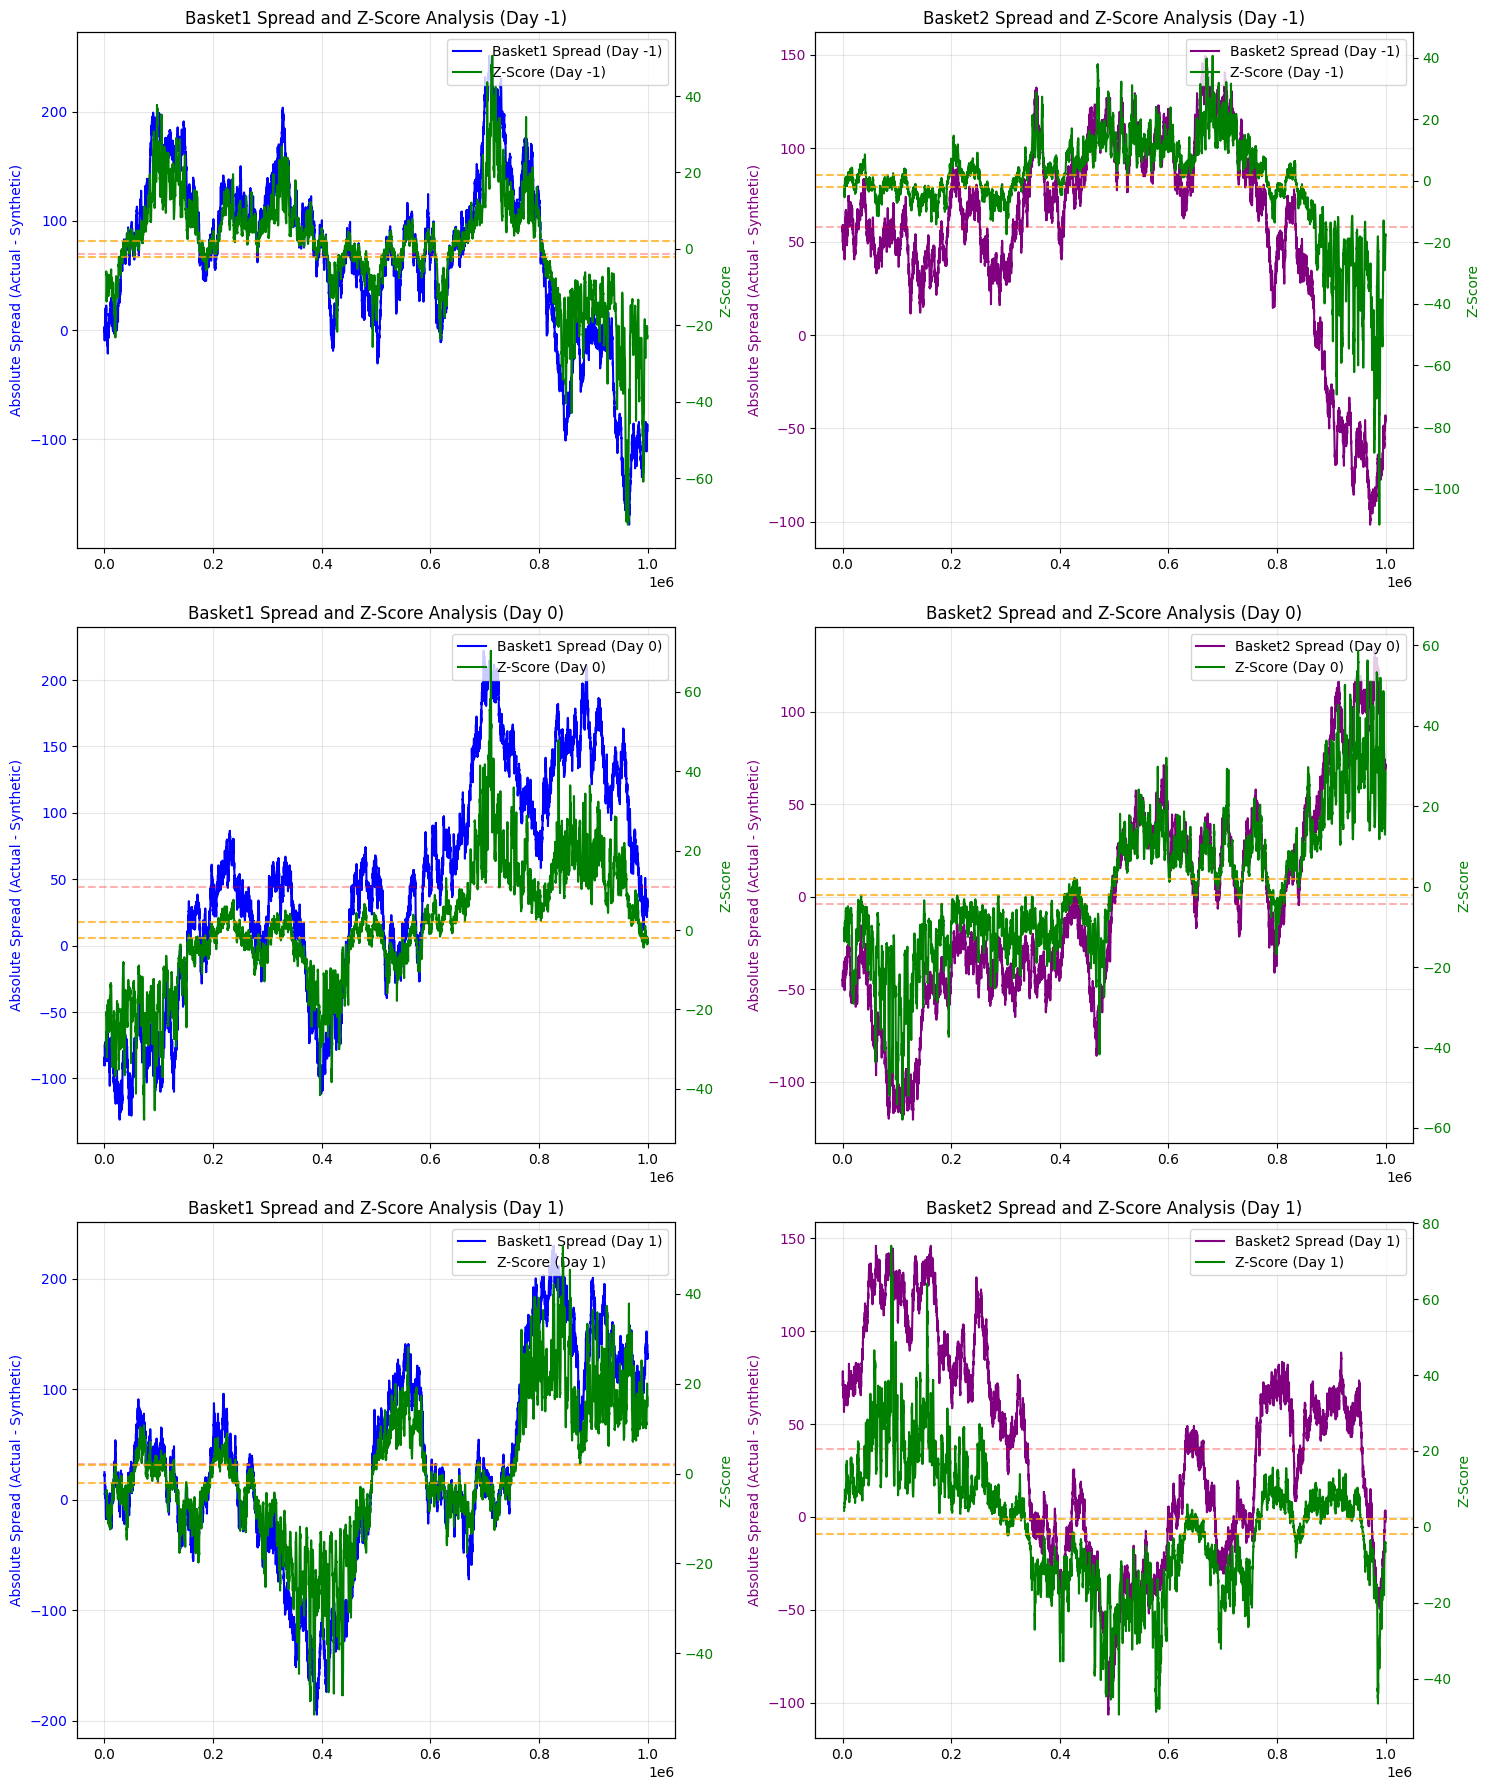

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 6 subplots (3 days x 2 baskets)
plt.figure(figsize=(15, 18))

# Loop through the three days
for i, day_value in enumerate([-1, 0, 1]):
    # Filter for rows with specified day value
    day_df = filled_prices_df[filled_prices_df['day'] == day_value]
    
    # Get the price data for the current day
    product_prices = get_product_prices(day_df)
    
    # Calculate spreads
    spreads_df = calculate_spreads(product_prices)
    
    # Set window size for rolling calculations
    window_size = 30  # Adjust this parameter as needed
    
    # Calculate statistics for Basket 1
    day_mean1 = spreads_df['SPREAD'].mean()
    spreads_df['ROLLING_STD1'] = spreads_df['SPREAD'].rolling(window=window_size).std()
    spreads_df['Z_SCORE1'] = (spreads_df['SPREAD'] - day_mean1) / spreads_df['ROLLING_STD1']
    
    # Calculate statistics for Basket 2
    day_mean2 = spreads_df['SPREAD2'].mean()
    spreads_df['ROLLING_STD2'] = spreads_df['SPREAD2'].rolling(window=window_size).std()
    spreads_df['Z_SCORE2'] = (spreads_df['SPREAD2'] - day_mean2) / spreads_df['ROLLING_STD2']
    
    # BASKET 1 SUBPLOT (top row)
    plt.subplot(3, 2, 2*i+1)
    
    # Plot both spread and z-score on the same subplot with dual y-axis
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    # Plot spread on left y-axis
    spread_line = ax1.plot(spreads_df.index, spreads_df['SPREAD'],
                           label=f'Basket1 Spread (Day {day_value})', color='blue')
    ax1.axhline(y=day_mean1, color='r', linestyle='--', alpha=0.3,
                label=f'Mean: {day_mean1:.2f}')
    ax1.set_ylabel('Absolute Spread (Actual - Synthetic)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Plot z-score on right y-axis
    z_line = ax2.plot(spreads_df.index, spreads_df['Z_SCORE1'],
                      label=f'Z-Score (Day {day_value})', color='green')
    ax2.axhline(y=2, color='orange', linestyle='--', alpha=0.7, label='Z = +2')
    ax2.axhline(y=-2, color='orange', linestyle='--', alpha=0.7, label='Z = -2')
    ax2.set_ylabel('Z-Score', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    
    # Title and grid
    plt.title(f'Basket1 Spread and Z-Score Analysis (Day {day_value})')
    ax1.grid(True, alpha=0.3)
    
    # Create combined legend
    lines = spread_line + z_line
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper right')
    
    # Print statistics for Basket 1
    day_spread_stats1 = {
        'Mean Spread': day_mean1,
        'Median Spread': spreads_df['SPREAD'].median(),
        'Min Spread': spreads_df['SPREAD'].min(),
        'Max Spread': spreads_df['SPREAD'].max(),
        'Std Dev': spreads_df['SPREAD'].std()
    }
    
    print(f"\nBasket1 Spread Statistics (Day {day_value}):")
    for stat, value in day_spread_stats1.items():
        print(f"{stat}: {value:.4f}")
    
    print(f"\nBasket1 Z-Score Statistics (Day {day_value}):")
    print(f"Min Z-Score: {spreads_df['Z_SCORE1'].min():.4f}")
    print(f"Max Z-Score: {spreads_df['Z_SCORE1'].max():.4f}")
    print(f"Z-Score > 2: {(spreads_df['Z_SCORE1'] > 2).sum()} points")
    print(f"Z-Score < -2: {(spreads_df['Z_SCORE1'] < -2).sum()} points")
    
    # BASKET 2 SUBPLOT (bottom row)
    plt.subplot(3, 2, 2*i+2)
    
    # Plot both spread and z-score on the same subplot with dual y-axis
    ax3 = plt.gca()
    ax4 = ax3.twinx()
    
    # Plot spread on left y-axis
    spread_line2 = ax3.plot(spreads_df.index, spreads_df['SPREAD2'],
                           label=f'Basket2 Spread (Day {day_value})', color='purple')
    ax3.axhline(y=day_mean2, color='r', linestyle='--', alpha=0.3,
                label=f'Mean: {day_mean2:.2f}')
    ax3.set_ylabel('Absolute Spread (Actual - Synthetic)', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')
    
    # Plot z-score on right y-axis
    z_line2 = ax4.plot(spreads_df.index, spreads_df['Z_SCORE2'],
                      label=f'Z-Score (Day {day_value})', color='green')
    ax4.axhline(y=2, color='orange', linestyle='--', alpha=0.7, label='Z = +2')
    ax4.axhline(y=-2, color='orange', linestyle='--', alpha=0.7, label='Z = -2')
    ax4.set_ylabel('Z-Score', color='green')
    ax4.tick_params(axis='y', labelcolor='green')
    
    # Title and grid
    plt.title(f'Basket2 Spread and Z-Score Analysis (Day {day_value})')
    ax3.grid(True, alpha=0.3)
    
    # Create combined legend
    lines2 = spread_line2 + z_line2
    labels2 = [l.get_label() for l in lines2]
    ax3.legend(lines2, labels2, loc='upper right')
    
    # Print statistics for Basket 2
    day_spread_stats2 = {
        'Mean Spread': day_mean2,
        'Median Spread': spreads_df['SPREAD2'].median(),
        'Min Spread': spreads_df['SPREAD2'].min(),
        'Max Spread': spreads_df['SPREAD2'].max(),
        'Std Dev': spreads_df['SPREAD2'].std()
    }
    
    print(f"\nBasket2 Spread Statistics (Day {day_value}):")
    for stat, value in day_spread_stats2.items():
        print(f"{stat}: {value:.4f}")
    
    print(f"\nBasket2 Z-Score Statistics (Day {day_value}):")
    print(f"Min Z-Score: {spreads_df['Z_SCORE2'].min():.4f}")
    print(f"Max Z-Score: {spreads_df['Z_SCORE2'].max():.4f}")
    print(f"Z-Score > 2: {(spreads_df['Z_SCORE2'] > 2).sum()} points")
    print(f"Z-Score < -2: {(spreads_df['Z_SCORE2'] < -2).sum()} points")

plt.tight_layout()
plt.show()

In [56]:
# Manual std devs per day from your previous output
basket1_stds = [78.6671, 82.7626, 89.1765]
basket2_stds = [51.8854, 55.1198, 55.1432]

# Mean of daily means (already in prior message)
basket1_means = [70.0449, 43.9226, 32.3198]
basket2_means = [58.0801, -3.8392, 36.4669]

# Calculate simple averages
default_mean_b1 = np.mean(basket1_means)
default_std_b1 = np.mean(basket1_stds)

default_mean_b2 = np.mean(basket2_means)
default_std_b2 = np.mean(basket2_stds)

# Display
print("\n--- Basket 1 ---")
print(f"Day Means: {basket1_means}")
print(f"Default Spread Mean (B1): {default_mean_b1:.4f}")
print(f"Default Spread Std  (B1): {default_std_b1:.4f}")

print("\n--- Basket 2 ---")
print(f"Day Means: {basket2_means}")
print(f"Default Spread Mean (B2): {default_mean_b2:.4f}")
print(f"Default Spread Std  (B2): {default_std_b2:.4f}")


--- Basket 1 ---
Day Means: [70.0449, 43.9226, 32.3198]
Default Spread Mean (B1): 48.7624
Default Spread Std  (B1): 83.5354

--- Basket 2 ---
Day Means: [58.0801, -3.8392, 36.4669]
Default Spread Mean (B2): 30.2359
Default Spread Std  (B2): 54.0495


In [12]:
# Calculate spread and add it as a column to the filled_prices_df
def add_spread_column(df):
   # Get product prices grouped by timestamp
   prices = df.groupby(['timestamp', 'product'])['mid_price'].last().unstack()
   
   # Ensure all required columns exist
   if not all(col in prices.columns for col in ['PICNIC_BASKET1', 'CROISSANTS', 'JAMS', 'DJEMBES']):
       print("Missing one or more required product columns")
       return df
   
   # Calculate synthetic basket price
   synthetic_prices = 6 * prices['CROISSANTS'] + 3 * prices['JAMS'] + 1 * prices['DJEMBES']
   
   # Calculate spread (actual - synthetic)
   spread = prices['PICNIC_BASKET1'] - synthetic_prices
   
   # Convert spread to a DataFrame with timestamp as index
   spread_df = pd.DataFrame({'SPREAD': spread})
   
   # Merge spread back to original dataframe
   # First reset index on spread_df to make timestamp a column
   spread_df = spread_df.reset_index()
   
   # Make a copy of the original dataframe
   result_df = df.copy()
   
   # Create a mapping of timestamp to spread
   spread_map = dict(zip(spread_df['timestamp'], spread_df['SPREAD']))
   
   # Add spread column to the result dataframe
   result_df['SPREAD'] = result_df['timestamp'].map(spread_map)
   
   return result_df

# Apply the function to add the spread column
filled_prices_df_with_spread = add_spread_column(filled_prices_df)

# Display the first few rows to verify
filled_prices_df_with_spread['SPREAD'].unique()

array([  25. ,   22.5,   21.5,   23. ,   20. ,   12.5,    6.5,    4.5,
          6. ,    5. ,    2. ,    1.5,    4. ,   11.5,   13. ,    8.5,
          2.5,    7. ,   -2.5,   -6. ,   -7. ,  -11.5,  -12. ,  -15. ,
        -14.5,  -17. ,  -12.5,  -17.5,  -15.5,  -13. ,   -6.5,   -8. ,
         -3. ,   -0.5,   -9. ,    1. ,   -4. ,  -11. ,  -13.5,  -10.5,
        -10. ,   -5.5,   -7.5,   -4.5,   -5. ,   -1.5,   -2. ,    3. ,
         -1. ,   -3.5,    0. ,   -8.5,  -16. ,  -14. ,  -20.5,  -21.5,
        -19. ,  -19.5,  -22. ,  -26. ,  -23.5,  -24. ,   10. ,    9. ,
          8. ,    7.5,   17.5,   19. ,   14. ,   31. ,   29.5,   24. ,
         32. ,   29. ,   23.5,   25.5,   34. ,   35. ,   33.5,   28. ,
         33. ,   39.5,   48. ,   46.5,   48.5,   54. ,   51. ,   52. ,
         45.5,   46. ,   40. ,   42. ,   35.5,   22. ,   18.5,   14.5,
         19.5,   13.5,   21. ,   24.5,   20.5,   15.5,   16. ,   15. ,
         17. ,   16.5,   12. ,    9.5,   10.5,   26.5,   18. ,    5.5,
      

In [13]:
filled_prices_df_with_spread.to_csv("spread_cleaned.csv", index=False)

# Analysis for Squid

In [12]:
filled_prices_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,day_from_file
0,-1,0,CROISSANTS,4304,112,4304.0,112.0,4304.0,112.0,4305,112,4305.0,112.0,4305.0,112.0,4304.5,0.0,-1
1,-1,0,JAMS,6670,66,6669.0,137.0,6670.0,66.0,6671,66,6672.0,137.0,6671.0,66.0,6670.5,0.0,-1
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,2005.0,1.0,2006,31,2006.0,31.0,2006.0,31.0,2005.5,0.0,-1
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,59284.0,20.0,59294,2,59295.0,36.0,59294.0,2.0,59289.0,0.0,-1
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,30606.0,20.0,30612,20,30613.0,18.0,30612.0,20.0,30609.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,1,999900,JAMS,6519,204,6519.0,204.0,6519.0,204.0,6521,204,6521.0,204.0,6521.0,204.0,6520.0,0.0,1
239996,1,999900,RAINFOREST_RESIN,9992,34,9992.0,34.0,9992.0,34.0,10008,34,10008.0,34.0,10008.0,34.0,10000.0,0.0,1
239997,1,999900,SQUID_INK,1880,20,1880.0,20.0,1880.0,20.0,1884,20,1884.0,20.0,1884.0,20.0,1882.0,0.0,1
239998,1,999900,PICNIC_BASKET1,58713,15,58712.0,21.0,58713.0,15.0,58724,15,58725.0,21.0,58724.0,15.0,58718.5,0.0,1


In [17]:
# Assuming the dataframe is already loaded as filled_prices_df
# Filter for just SQUID_INK data
squid_df = filled_prices_df[filled_prices_df['product'] == 'SQUID_INK'].copy()

# Check data
print(f"SQUID_INK data points: {len(squid_df)}")
squid_df[['timestamp', 'mid_price']].head()

SQUID_INK data points: 30000


,timestamp,mid_price
2,0,2005.5
15,100,2005.5
21,200,2004.5
25,300,2004.5
34,400,2005.5


In [18]:
# Calculate rolling z-score function
def calculate_zscore(prices, window=20):
    rolling_mean = prices.rolling(window=window).mean()
    rolling_std = prices.rolling(window=window).std()
    return (prices - rolling_mean) / rolling_std

# Calculate z-scores with different window sizes
windows = [10, 20, 50]
for window in windows:
    squid_df[f'zscore_{window}'] = calculate_zscore(squid_df['mid_price'], window)

In [19]:
squid_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,day_from_file,zscore_10,zscore_20,zscore_50
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,2005.0,1.0,2006,...,2006.0,31.0,2006.0,31.0,2005.5,0.0,-1,NaN,NaN,NaN
15,-1,100,SQUID_INK,2004,24,2004.0,24.0,2004.0,24.0,2007,...,2007.0,24.0,2007.0,24.0,2005.5,0.0,-1,NaN,NaN,NaN
21,-1,200,SQUID_INK,2003,22,2003.0,22.0,2003.0,22.0,2006,...,2006.0,20.0,2006.0,20.0,2004.5,0.0,-1,NaN,NaN,NaN
25,-1,300,SQUID_INK,2003,31,2003.0,31.0,2003.0,31.0,2006,...,2006.0,31.0,2006.0,31.0,2004.5,0.0,-1,NaN,NaN,NaN
34,-1,400,SQUID_INK,2004,27,2004.0,27.0,2004.0,27.0,2007,...,2007.0,27.0,2007.0,27.0,2005.5,0.0,-1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239965,1,999500,SQUID_INK,1878,1,1876.0,25.0,1878.0,1.0,1879,...,1879.0,25.0,1879.0,25.0,1878.5,0.0,1,0.074080,0.524309,0.667664
239971,1,999600,SQUID_INK,1879,2,1878.0,24.0,1879.0,2.0,1881,...,1881.0,24.0,1881.0,24.0,1880.0,0.0,1,1.181604,1.336158,0.990033
239977,1,999700,SQUID_INK,1878,30,1878.0,30.0,1878.0,30.0,1879,...,1882.0,30.0,1879.0,1.0,1878.5,0.0,1,-0.520580,0.519931,0.595844
239989,1,999800,SQUID_INK,1881,24,1881.0,24.0,1881.0,24.0,1883,...,1884.0,24.0,1883.0,8.0,1882.0,0.0,1,2.161715,2.063663,1.434733


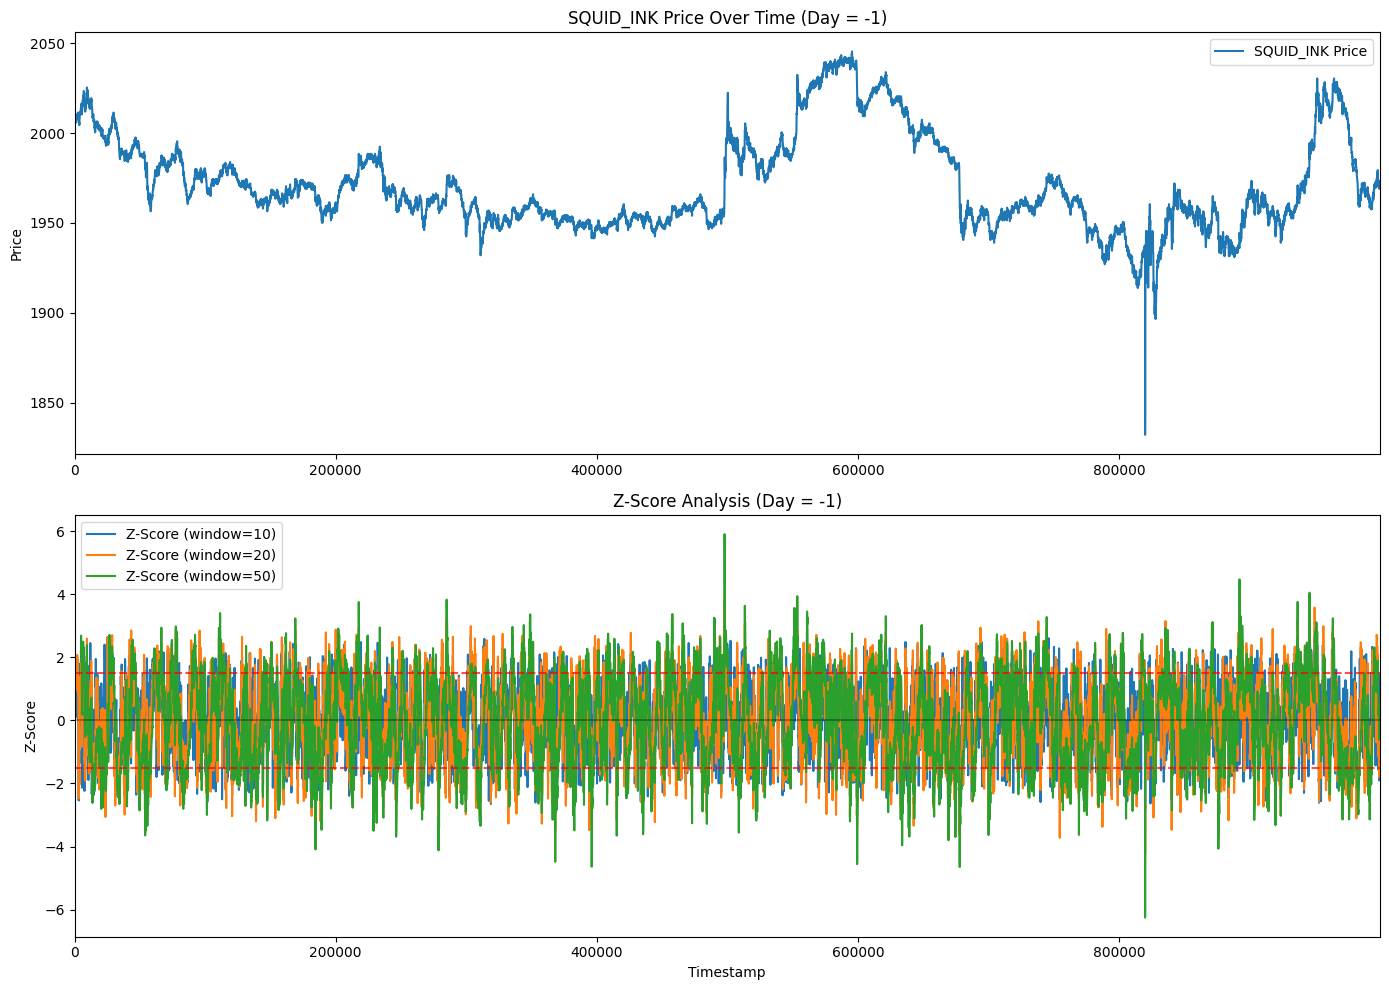


Day -1 Statistics:
Data points: 10000
Price range: 1832.0 to 2045.5
Average price: 1971.55

Z-Score (window=10) statistics:
  Range: -2.85 to 2.76
  Above +1.5: 998 times (10.0%)
  Below -1.5: 1078 times (10.8%)

Z-Score (window=20) statistics:
  Range: -4.24 to 3.87
  Above +1.5: 1306 times (13.1%)
  Below -1.5: 1343 times (13.5%)

Z-Score (window=50) statistics:
  Range: -6.25 to 5.90
  Above +1.5: 1450 times (14.6%)
  Below -1.5: 1604 times (16.1%)


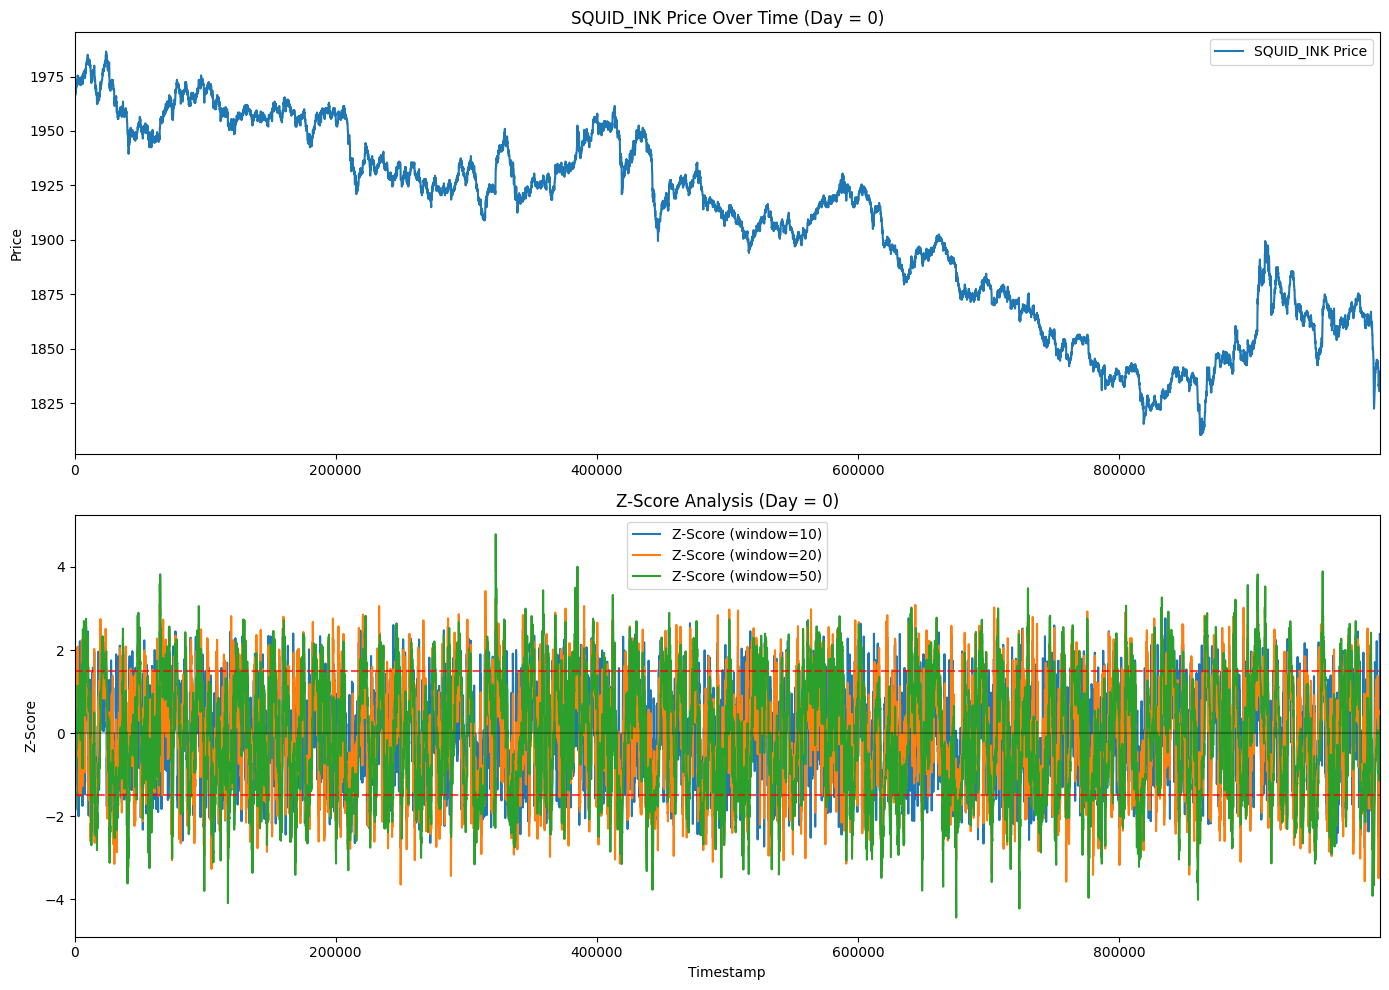


Day 0 Statistics:
Data points: 10000
Price range: 1810.5 to 1986.5
Average price: 1907.84

Z-Score (window=10) statistics:
  Range: -2.76 to 2.77
  Above +1.5: 1039 times (10.4%)
  Below -1.5: 1121 times (11.2%)

Z-Score (window=20) statistics:
  Range: -3.65 to 3.62
  Above +1.5: 1293 times (12.9%)
  Below -1.5: 1445 times (14.4%)

Z-Score (window=50) statistics:
  Range: -4.44 to 4.79
  Above +1.5: 1464 times (14.6%)
  Below -1.5: 1691 times (16.9%)


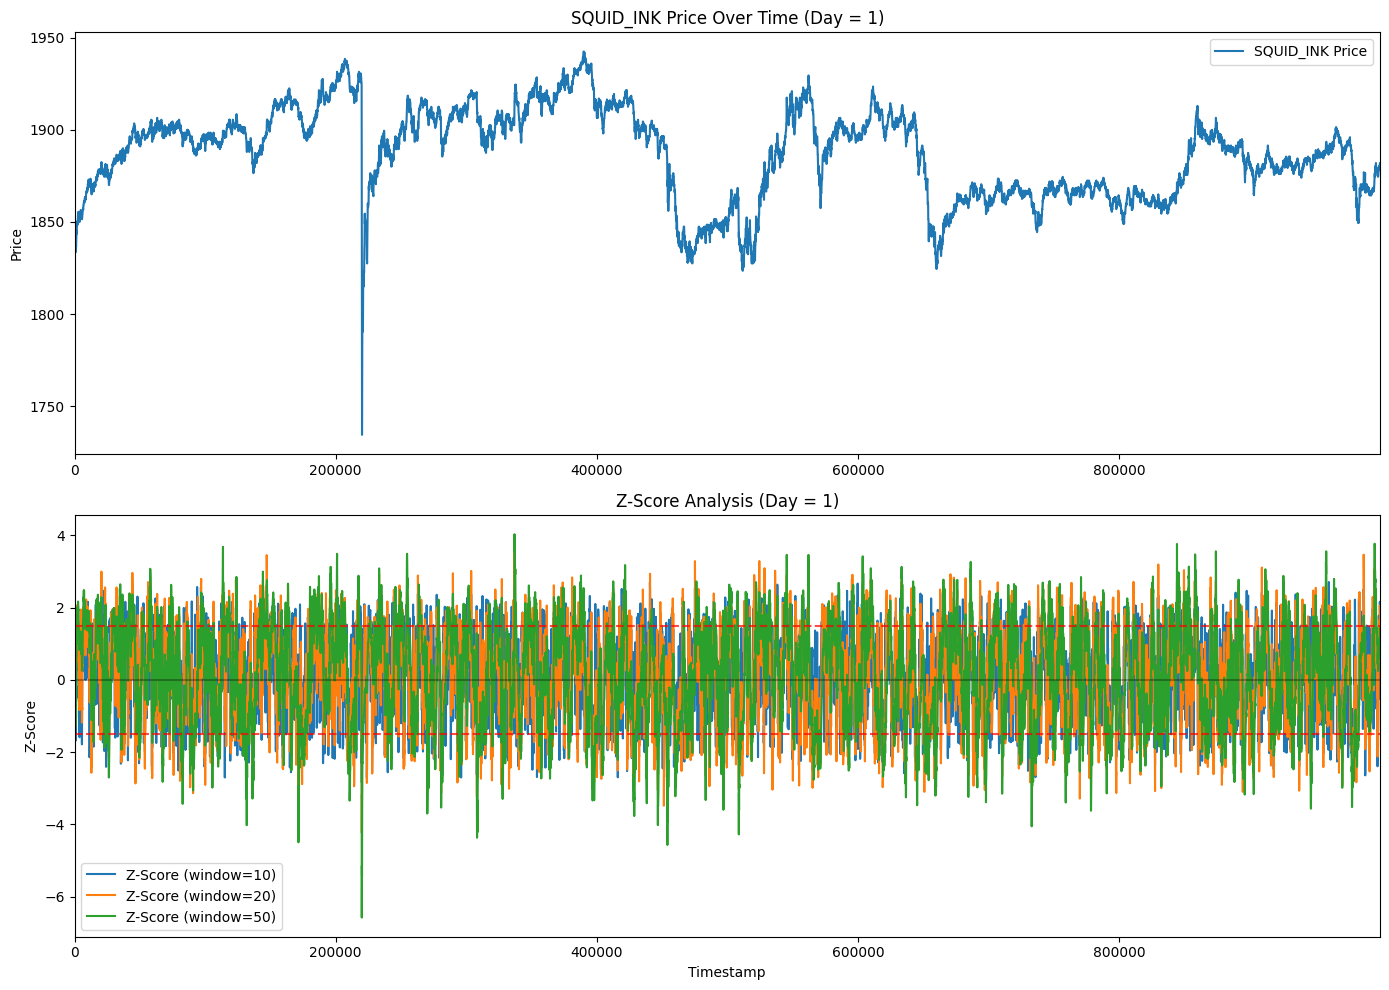


Day 1 Statistics:
Data points: 10000
Price range: 1734.5 to 1942.5
Average price: 1887.32

Z-Score (window=10) statistics:
  Range: -2.84 to 2.71
  Above +1.5: 1175 times (11.8%)
  Below -1.5: 1085 times (10.8%)

Z-Score (window=20) statistics:
  Range: -4.24 to 3.61
  Above +1.5: 1514 times (15.1%)
  Below -1.5: 1289 times (12.9%)

Z-Score (window=50) statistics:
  Range: -6.58 to 4.03
  Above +1.5: 1677 times (16.8%)
  Below -1.5: 1245 times (12.4%)


In [24]:
# Split data by day and create separate plots for each day value
days = sorted(squid_df['day'].unique())

for day in days:
    # Filter data for the current day
    day_data = squid_df[squid_df['day'] == day].copy()
    
    if len(day_data) == 0:
        continue
        
    plt.figure(figsize=(14, 10))
    
    # Plot price vs timestamp
    ax1 = plt.subplot(211)
    ax1.plot(day_data['timestamp'], day_data['mid_price'], label='SQUID_INK Price')
    ax1.set_title(f'SQUID_INK Price Over Time (Day = {day})')
    ax1.set_ylabel('Price')
    ax1.set_xlim(day_data['timestamp'].min(), day_data['timestamp'].max())
    ax1.legend()
    
    # Plot z-scores with different windows
    ax2 = plt.subplot(212, sharex=ax1)
    for window in windows:
        ax2.plot(day_data['timestamp'], day_data[f'zscore_{window}'], 
                label=f'Z-Score (window={window})')
    
    # Add threshold lines
    ax2.axhline(y=1.5, color='r', linestyle='--', alpha=0.7)
    ax2.axhline(y=-1.5, color='r', linestyle='--', alpha=0.7)
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    ax2.set_title(f'Z-Score Analysis (Day = {day})')
    ax2.set_ylabel('Z-Score')
    ax2.set_xlabel('Timestamp')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics for this day
    print(f"\nDay {day} Statistics:")
    print(f"Data points: {len(day_data)}")
    print(f"Price range: {day_data['mid_price'].min()} to {day_data['mid_price'].max()}")
    print(f"Average price: {day_data['mid_price'].mean():.2f}")
    
    # Z-score statistics
    for window in windows:
        zscore_col = f'zscore_{window}'
        valid_zscores = day_data[zscore_col].dropna()
        if len(valid_zscores) > 0:
            print(f"\nZ-Score (window={window}) statistics:")
            print(f"  Range: {valid_zscores.min():.2f} to {valid_zscores.max():.2f}")
            print(f"  Above +1.5: {(valid_zscores > 1.5).sum()} times ({(valid_zscores > 1.5).mean()*100:.1f}%)")
            print(f"  Below -1.5: {(valid_zscores < -1.5).sum()} times ({(valid_zscores < -1.5).mean()*100:.1f}%)")

In [23]:
squid_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,day_from_file,zscore_10,zscore_20,zscore_50
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,2005.0,1.0,2006,...,2006.0,31.0,2006.0,31.0,2005.5,0.0,-1,NaN,NaN,NaN
15,-1,100,SQUID_INK,2004,24,2004.0,24.0,2004.0,24.0,2007,...,2007.0,24.0,2007.0,24.0,2005.5,0.0,-1,NaN,NaN,NaN
21,-1,200,SQUID_INK,2003,22,2003.0,22.0,2003.0,22.0,2006,...,2006.0,20.0,2006.0,20.0,2004.5,0.0,-1,NaN,NaN,NaN
25,-1,300,SQUID_INK,2003,31,2003.0,31.0,2003.0,31.0,2006,...,2006.0,31.0,2006.0,31.0,2004.5,0.0,-1,NaN,NaN,NaN
34,-1,400,SQUID_INK,2004,27,2004.0,27.0,2004.0,27.0,2007,...,2007.0,27.0,2007.0,27.0,2005.5,0.0,-1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239965,1,999500,SQUID_INK,1878,1,1876.0,25.0,1878.0,1.0,1879,...,1879.0,25.0,1879.0,25.0,1878.5,0.0,1,0.074080,0.524309,0.667664
239971,1,999600,SQUID_INK,1879,2,1878.0,24.0,1879.0,2.0,1881,...,1881.0,24.0,1881.0,24.0,1880.0,0.0,1,1.181604,1.336158,0.990033
239977,1,999700,SQUID_INK,1878,30,1878.0,30.0,1878.0,30.0,1879,...,1882.0,30.0,1879.0,1.0,1878.5,0.0,1,-0.520580,0.519931,0.595844
239989,1,999800,SQUID_INK,1881,24,1881.0,24.0,1881.0,24.0,1883,...,1884.0,24.0,1883.0,8.0,1882.0,0.0,1,2.161715,2.063663,1.434733
